# Resolving the Schrödinger's Cat Paradox with Quantum Circuits 

Добро пожаловать в обучающий курс по коду для части серии «Парадоксы» на YouTube-канале Qiskit, посвящённой «Коту Шрёдингера».

В этом руководстве мы поможем вам лучше понять знаменитый мысленный эксперимент Шрёдингера с помощью квантовых схем, созданных с использованием Qiskit!

Если вы ещё этого не сделали, рекомендую сначала посмотреть [наше видео](https://youtu.be/sBtAe8BsOhA) на YouTube-канале Qiskit, где вы найдёте полезный обзор кода Qiskit, который мы будем использовать для симуляции в данном руководстве. Также советую ознакомиться с записью в блоге (скоро будет опубликована на [Qiskit Medium](https://medium.com/qiskit)), чтобы углубиться в детали мысленного эксперимента.

Если вы ещё не успели изучить эти материалы или вам нужно освежить знания, вот краткое изложение мысленного эксперимента «Кот Шрёдингера»:

### **Кот Шрёдингера**

В оригинальном парадоксе мы представляем себе кота, находящегося внутри коробки вместе с ампулой яда, маленьким молоточком и радиоактивным атомом. Если атом распадётся, он активирует молоточек, который разобьёт ампулу с ядом, и кот погибнет. Если атом не распадётся, молоточек не разобьёт ампулу, и кот останется жив.

Ситуация становится интересной, если атом находится в квантовой суперпозиции состояний распада и отсутствия распада. Согласно квантовой механике, атом и кот становятся квантово запутанными, переходя в совместную суперпозицию двух состояний. В одном из них атом распался, и кот мёртв. В другом атом не распался, и кот жив. Таким образом, коробка содержит кота, находящегося в суперпозиции состояний одновременно живого и мёртвого.

### **«Кот Шрёдингера» как квантовая схема**

Я собираюсь представить каждую часть мысленного эксперимента «Кот Шрёдингера» с использованием квантовых вентилей и кубитов, чтобы мы могли лучше понять, что происходит. Если вы не знакомы с кубитами и квантовыми вентилями, такими как Hadamard и CNOT, я настоятельно рекомендую изучить курс «Введение в квантовые вычисления» в [учебнике Qiskit](https://learn.qiskit.org/course/introduction/why-quantum-computing), прежде чем продолжить.

Для начала я буду использовать кубит, чтобы представить радиоактивный атом. Наш атом должен находиться в суперпозиции двух состояний: распавшегося и нераспавшегося. Чтобы достичь этого, мы поместим кубит в равновесную квантовую суперпозицию состояний |0⟩ и |1⟩, переведя его в состояние |+⟩. Это можно сделать, начав с кубита в состоянии |0⟩ и применив к нему вентиль Адамара (Hadamard gate).
С помощью вентиля Адамара мы создаём суперпозицию, необходимую для моделирования радиоактивного атома в мысленном эксперименте.

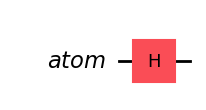

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr_atom = QuantumRegister(1, name="atom")

qc = QuantumCircuit(qr_atom)

qc.h(qr_atom[0])

qc.draw("mpl")


The Hadamard gate acts on a qubit in the |0⟩ state as follows: 

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Let's add a measurement at the end and run the circuit:

In [ ]:
qc.measure_all()

from qiskit_aer import AerSimulator 
backend = AerSimulator()
result = backend.run(qc).result()

print(result.get_counts())


{'0': 502, '1': 522}


We see that half the time we get zero when we measure our qubit, and half the time we get one. 

Теперь добавим второй кубит, чтобы представить кота внутри коробки. Для представления взаимодействия кота с радиоактивным атомом мы будем использовать вентиль CNOT. Если атом находится в состоянии |0⟩ (не распался), кубит кота останется в состоянии |0⟩, что означает, что кот жив. Если атом находится в состоянии |1⟩ (распался), кубит кота перевернётся в состояние |1⟩, что означает, что кот мёртв.

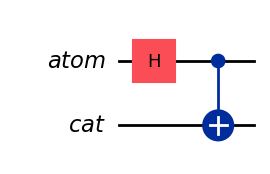

In [ ]:
qr_cat = QuantumRegister(1, name="cat")
qc = QuantumCircuit(qr_atom, qr_cat)

qc.h(qr_atom[0])

qc.cx(qr_atom[0], qr_cat[0])

qc.draw("mpl")


The CNOT gate acts on the atom and cat qubits as follows: 

$$CNOT\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Здесь мы предполагаем, что наблюдение атома котом не вызывает необратимого коллапса. Вместо этого кот рассматривается как квантовая система, которая запутывается с атомом и входит в квантовую суперпозицию состояний: живой с нераспавшимся атомом и мёртвый с распавшимся атомом.

Let's see the outcomes of adding measurements to the circuit and running it on the simulator: 

In [4]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())


{'00': 519, '11': 505}


Результаты всегда будут либо 00, либо 11, что показывает, что состояние кота полностью запутано с состоянием атома. А что происходит, если мы заглянем в коробку? Нам нужно смоделировать наше собственное наблюдение кота. Учёные, поддерживающие теорию "необратимого коллапса", будут моделировать наше наблюдение иначе, чем те, кто придерживается теории "без коллапса".

Как мы объясняем в [видео](https://youtu.be/sBtAe8BsOhA), существуют две теории о том, что происходит, когда мы наблюдаем систему: теория "необратимого коллапса" и теория "без коллапса". Нам придётся моделировать наше наблюдение системы по-разному, в зависимости от того, какой теории мы придерживаемся.

Версия "коллапс" при заглядывании в коробку — это выполнение схемы с измерением за один шот (т.е. всего один запуск схемы):

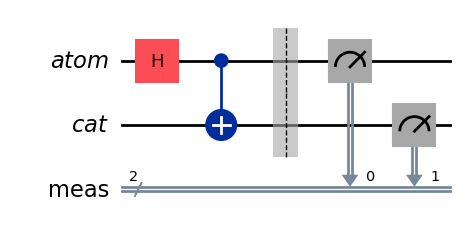

In [ ]:
qc.draw("mpl")


In [6]:
result = backend.run(qc, shots=1).result()

print(result.get_counts())


{'11': 1}


В этом случае результат оказался 0, поэтому кот «коллапсировал» в состояние живого, когда мы на него посмотрели. Если вы выполните схему сами, результат иногда будет 0, а иногда 1, что указывает на то, что кот мёртв.

В версии "без коллапса" мы можем также моделировать себя как квантовую систему. Когда мы заглядываем в коробку, мы становимся квантово запутанными с котом и входим в запутанную суперпозицию. Для этого мы добавим третий кубит, который будет представлять память наблюдателя, и добавим вентиль CNOT, где кот будет управляющим кубитом, а мы — целевым. Состояние кота (жив или мёртв) копируется в нашу память: если оно равно 0 (жив), то мы записываем 0 (жив) в память; если оно равно 1 (мёртв), то мы записываем 1 (мёртв) в память. Это приводит к следующей квантовой схеме:

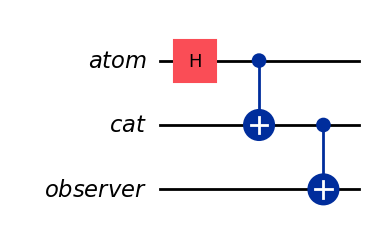

In [ ]:
qr_observer = QuantumRegister(1, name="observer")
qc = QuantumCircuit(qr_atom, qr_cat, qr_observer)

qc.h(qr_atom[0])

qc.cx(qr_atom[0], qr_cat[0])

qc.cx(qr_cat[0], qr_observer[0])

qc.draw("mpl")


Три кубита — атом, кот и память наблюдателя — теперь находятся в большой запутанной суперпозиции:

$$\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

Результаты измерений составляют 50% времени 000 и 50% времени 111:

In [8]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())


{'111': 498, '000': 526}


### Декогеренция: почему все видят один результат для состояния кота

Если наблюдатель действительно входит в запутанную суперпозицию, почему он и окружающий мир видят только один результат?

Чтобы это понять, я люблю представлять окружающую среду как набор домино. Как только мы сбиваем одно домино, оно запускает цепную реакцию, которая распространяется на весь набор домино, пока все они не упадут. Теперь представьте, что каждое домино представляет собой кубит, а окружающая среда — это набор кубитов. Когда первый кубит получает информацию о том, жив ли кот или мёртв, она передаётся следующему кубиту, затем следующему, и так далее. Один за другим все кубиты окружающей среды присоединяются к гигантской запутанной суперпозиции, образуя общее состояние:

$$\frac{1}{\sqrt{2}}(|00...0\rangle + |11...1\rangle)$$

В квантовой схеме эту цепочку передачи информации о состоянии кота от одного кубита к другому можно представить с помощью серии вентилей CNOT, расположенных между кубитами окружающей среды:

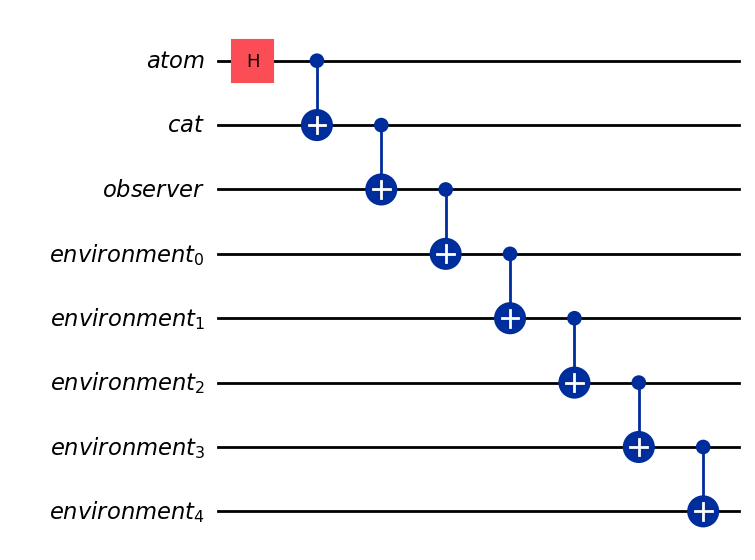

In [ ]:
qr_env = QuantumRegister(5, name='environment')

qc = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_env)

qc.h(qr_atom[0])

qc.cx(qr_atom, qr_cat)

qc.cx(qr_cat[0], qr_observer[0])

qc.cx(qr_observer, qr_env[0])
qc.cx(qr_env[0], qr_env[1])
qc.cx(qr_env[1], qr_env[2])
qc.cx(qr_env[2], qr_env[3])
qc.cx(qr_env[3], qr_env[4])

qc.draw("mpl")


Measuring these, we get the outcome:

In [10]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())


{'00000000': 528, '11111111': 496}


В каждой ветви суперпозиции кубиты либо все равны нулю, либо все равны единице. В Эвереттовской интерпретации квантовой механики это означает, что наблюдатель либо находится в ветви вселенной, где он и все вокруг видят кота мёртвым, либо в ветви, где он и все вокруг видят кота живым. Таким образом, даже если общее квантовое состояние атома, кота, наблюдателя и окружающей среды находится в когерентной суперпозиции, наблюдатель видит только один результат измерения, и весь остальной мир вокруг него соглашается с этим результатом.

Сбить все домино гораздо легче, чем поставить их обратно. 

Аналогично, распространить информацию о квантовой системе по окружающей среде гораздо легче, чем стереть её из среды. 

Именно поэтому состояние кота фиксируется как мёртвое или живое. 

Без квантового контроля над окружающей средой даже самая мощная технология не может устранить запутанность кота с окружающей средой.

Этот процесс называется декогеренцией, потому что атом, кот и наблюдатель теряют свою квантовую когерентность, как только взаимодействуют с окружающей средой. 

В общем случае, для любой среды, над которой у нас нет квантового контроля, измерение системы проецирует её в одно состояние, разрушая её квантовую когерентность.

Борьба с эффектами декогеренции — одна из ключевых задач квантовых вычислений. Чтобы сохранить когерентные свойства квантовых состояний, которые мы используем для обработки квантовой информации, мы стремимся максимально изолировать их от окружающей среды. Как только кубиты взаимодействуют с окружающей средой, они теряют когерентность и фиксируются в отдельных ветвях, где находятся либо в состоянии |0⟩, либо в состоянии |1⟩.

Теперь давайте модифицируем квантовую схему для случая, когда измерение вызывает необратимый коллапс. Где-то в цепочке CNOT-вентилей необходимо добавить необратимое измерение. Это может быть в момент, когда кот "измеряет" атом, или когда наблюдатель измеряет кота, или в другом месте цепочки, в зависимости от объяснения механизма коллапса. Здесь я добавил барьеры, чтобы показать разные точки на схеме, где может произойти необратимый коллапс:

In [11]:
cr_atom = ClassicalRegister(1, name='c_atom')
cr_cat = ClassicalRegister(1, name='c_cat')
cr_observer = ClassicalRegister(1, name='c_observer')
cr_env = ClassicalRegister(5, name='c_environment')

qc = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_env, cr_atom, cr_cat, cr_observer, cr_env)

qc.h(qr_atom[0])

qc.barrier()
qc.measure(qr_atom[0], cr_atom[0])

qc.cx(qr_atom, qr_cat)

qc.barrier()
qc.measure(qr_cat[0], cr_cat[0])

qc.cx(qr_cat[0], qr_observer[0])

qc.barrier()
qc.measure(qr_observer[0], cr_observer[0])
qc.cx(qr_observer[0], qr_env[0])

for i in range(4):
    qc.barrier()
    qc.measure(qr_env[i], cr_env[i])  
    qc.cx(qr_env[i], qr_env[i+1])

qc.barrier()
qc.measure(qr_env[4], cr_env[4])


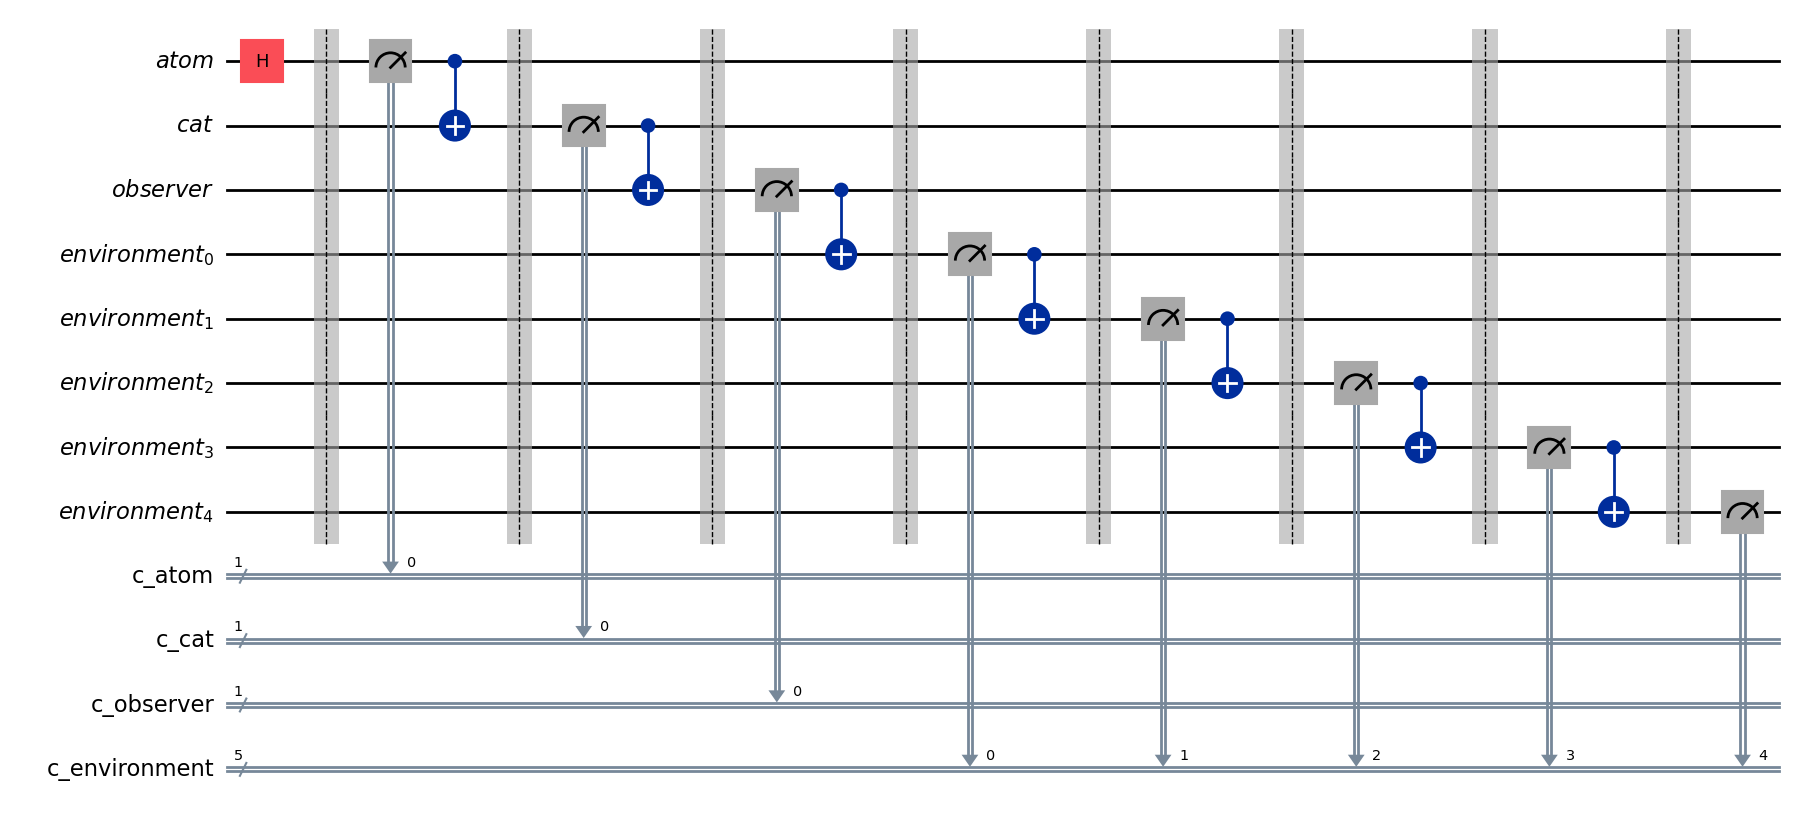

In [ ]:
qc.draw("mpl")


Результаты измерений такие же, как мы бы наблюдали без измерений до вентилей CNOT, то есть либо все 0, либо все 1:

In [13]:
result = backend.run(qc).result()

print(result.get_counts())


{'11111 1 1 1': 528, '00000 0 0 0': 496}


### Неотличимость коллапса и отсутствия коллапса

Когда у нас нет квантового контроля над окружающей средой, состояние подсистемы атома, кота и наблюдателя математически идентично тому, как если бы оно прошло через необратимый коллапс. 

Если вы знакомы с матрицами плотности, вы можете доказать это самостоятельно, показав, что матрица плотности кубитов атома, кота и наблюдателя в случаях с коллапсом и без него одинаковая:

$$\frac{1}{2}(|000\rangle \langle 000| + |111\rangle \langle 111|)$$

В квантовых вычислениях эта эквивалентность связана с принципом отложенного измерения. Согласно этому принципу, перенос измерений с места до управляющих вентилей CNOT на место после вентилей CNOT не влияет на распределение результатов измерений. Вы можете увидеть из наших квантовых схем с коллапсом и без него, что они эквивалентны с точки зрения переноса измерений через вентили CNOT.

Эта эквивалентность между квантовыми состояниями после декогеренции и квантовыми состояниями после необратимого коллапса приводит к очень распространённому заблуждению, заключающемуся в том, чтобы считать коллапс и отсутствие коллапса лишь философскими интерпретациями квантовой теории, без каких-либо наблюдаемых различий. В следующей части серии я объясню важный мысленный эксперимент, который демонстрирует противоречие при наивном применении идеи, что наблюдение вызывает коллапс. Этот мысленный эксперимент также сыграл важную роль в зарождении квантовых вычислений. Он называется «Друг Вигнера».

Надеюсь, вам понравилось решать парадокс кота Шрёдингера с помощью квантовых схем, где мы увидели, что большие суперпозиции действительно самосогласованы и оказывают на кота Шрёдингера тот же эффект, что и необратимое измерение.

Следите за YouTube-каналом и блогом Qiskit, чтобы узнать больше о решении парадоксов!